In [1]:
import os
import urllib
import cv2
import numpy as np
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt

(3024, 2299, 3)


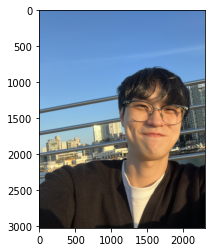

In [8]:
img_path = 'images/test_img.jpg'  
img_orig = cv2.imread(img_path) 

print(img_orig.shape)

plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

In [9]:
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models' 
# 2
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5') 

model = semantic_segmentation() #PixelLib 라이브러리 에서 가져온 클래스를 가져와서 semantic segmentation을 수행하는 클래스 인스턴스를 만듬
model.load_pascalvoc_model(model_file) 

In [10]:
segvalues, output = model.segmentAsPascalvoc(img_path)

In [11]:
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

21

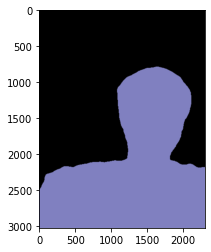

In [12]:
plt.imshow(output)
plt.show()

In [13]:
segvalues

{'class_ids': array([ 0, 15]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]])}

In [14]:
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
person


In [15]:
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20]

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [16]:
colormap[15]

array([192, 128, 128])

In [17]:
seg_color = (128,128,192)

(3024, 2299)


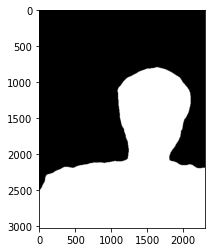

In [18]:
seg_map = np.all(output==seg_color, axis=-1) 
print(seg_map.shape) 
plt.imshow(seg_map, cmap='gray')
plt.show()

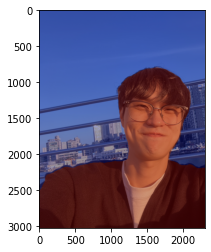

In [19]:
img_show = img_orig.copy()

img_mask = seg_map.astype(np.uint8) * 255

color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

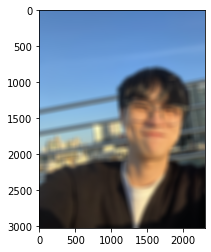

In [30]:
img_orig_blur = cv2.blur(img_orig, (80,80))

plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

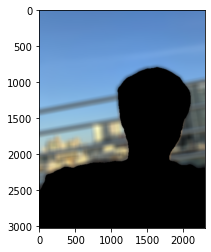

In [31]:
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)

img_bg_mask = cv2.bitwise_not(img_mask_color)

img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

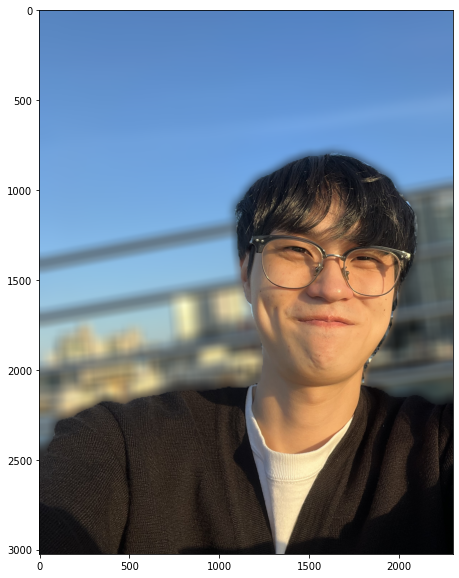

In [36]:
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)

plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

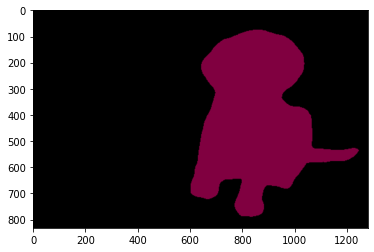

In [47]:

img_path = 'images/dog.jpg'  
img_orig = cv2.imread(img_path) 



model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models' 
# 2
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5') 

model = semantic_segmentation() #PixelLib 라이브러리 에서 가져온 클래스를 가져와서 semantic segmentation을 수행하는 클래스 인스턴스를 만듬
model.load_pascalvoc_model(model_file) 

segvalues, output = model.segmentAsPascalvoc(img_path)

plt.imshow(output)
plt.show()

In [49]:
#pascalvoc 데이터의 라벨종류
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]


background
dog


In [50]:
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20]

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [53]:
colormap[12]

array([ 64,   0, 128])

In [61]:
seg_color = (128,0,64)

(832, 1280)


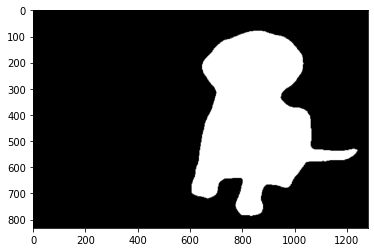

In [62]:
seg_map = np.all(output==seg_color, axis=-1) 
print(seg_map.shape) 
plt.imshow(seg_map, cmap='gray')
plt.show()

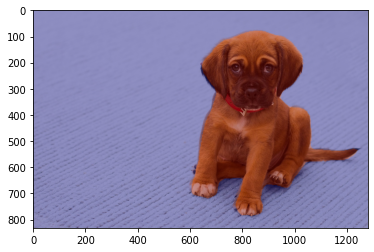

In [72]:
img_show = img_orig.copy()

img_mask = seg_map.astype(np.uint8) * 255

color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

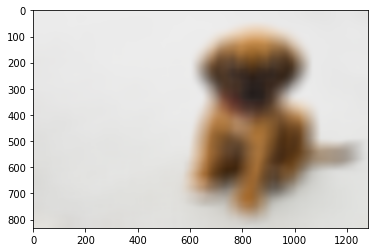

In [69]:
img_orig_blur = cv2.blur(img_orig, (80,80))

plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

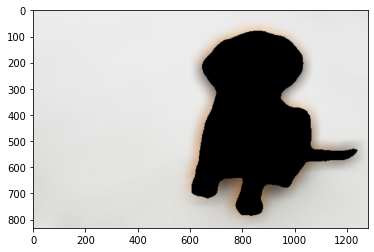

In [70]:
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)

img_bg_mask = cv2.bitwise_not(img_mask_color)

img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

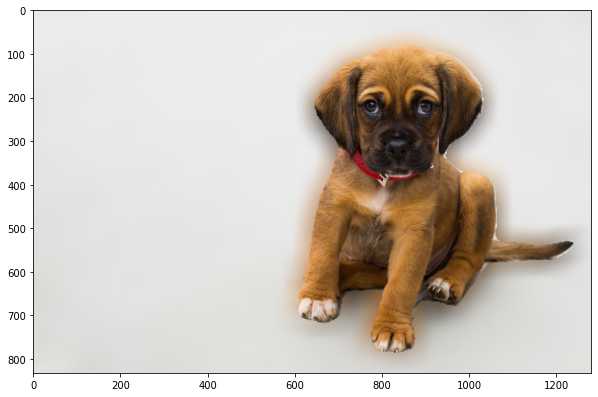

In [71]:
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)

plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

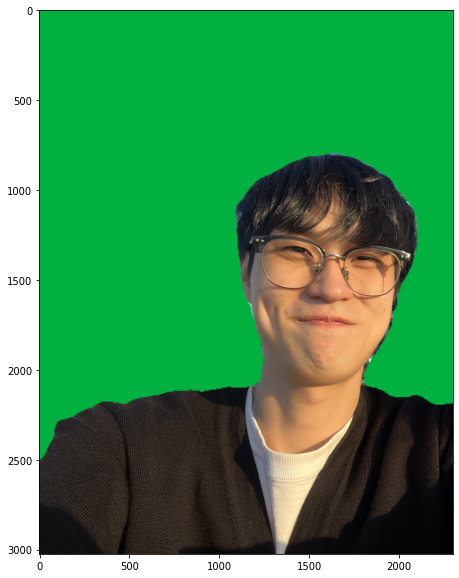

In [85]:
img_path = 'images/test_img.jpg'  
img_orig = cv2.imread(img_path) 

bg_path = 'images/bg_green.png' # 배경이미지 패스설정 
background_img = cv2.imread(bg_path) # 배경이미지 읽기

background_img = cv2.resize(background_img, (img_orig.shape[1], img_orig.shape[0])) # 배경이미지를 인물사진크기로 리사이즈
model = semantic_segmentation() #PixelLib 라이브러리 에서 가져온 클래스를 가져와서 semantic segmentation을 수행하는 클래스 인스턴스를 만듬
model.load_pascalvoc_model(model_file) 

segvalues, output = model.segmentAsPascalvoc(img_path)

colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20]

seg_color = (128,128,192)

seg_map = np.all(output==seg_color, axis=-1) 

img_show = img_orig.copy()

img_mask = seg_map.astype(np.uint8) * 255

color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

img_orig_blur = cv2.blur(img_orig, (80,80))

img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)

img_bg_mask = cv2.bitwise_not(img_mask_color)


img_concat = np.where(img_mask_color == 255, img_orig, background_img) # 배경이미지를 크로마키이미지로 concat
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

### 문제점을 찾기위해 blur를 과도하게 키워본다.

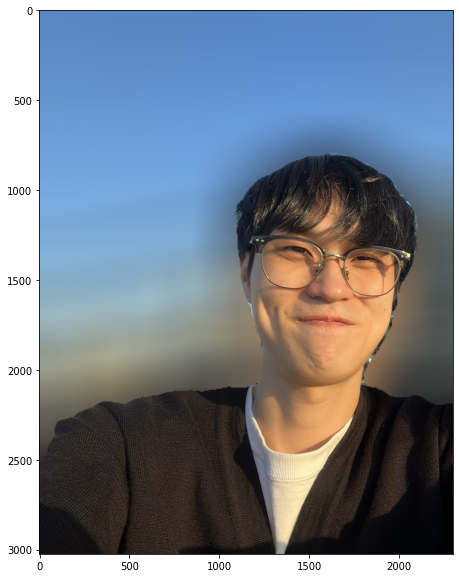

In [89]:
img_path = 'images/test_img.jpg'  
img_orig = cv2.imread(img_path) 

bg_path = 'images/bg_green.png' # 배경이미지 패스설정 
background_img = cv2.imread(bg_path) # 배경이미지 읽기

background_img = cv2.resize(background_img, (img_orig.shape[1], img_orig.shape[0])) # 배경이미지를 인물사진크기로 리사이즈
model = semantic_segmentation() #PixelLib 라이브러리 에서 가져온 클래스를 가져와서 semantic segmentation을 수행하는 클래스 인스턴스를 만듬
model.load_pascalvoc_model(model_file) 

segvalues, output = model.segmentAsPascalvoc(img_path)

colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20]

seg_color = (128,128,192)

seg_map = np.all(output==seg_color, axis=-1) 

img_show = img_orig.copy()

img_mask = seg_map.astype(np.uint8) * 255

color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

# blur를 500으로 키워 문제점  찾기
img_orig_blur = cv2.blur(img_orig, (500,500))

img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)

img_bg_mask = cv2.bitwise_not(img_mask_color)

img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)


img_concat = np.where(img_mask_color == 255, img_orig, img_bg_blur) # 배경이미지를 크로마키이미지로 concat
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

### 안경쪽 경계부분에 어색한 흐림이 나타남

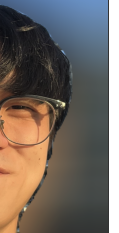

### Problem : blur효과가 찾은 인물의 경계선을 기준으로 0 -> 100이 되어버리기 때문에 blur효과가 그라데이션처럼 서서히 일어난다면 훨씬 자연스러운 이미지를 얻을 수 있을 것 같음

[Solution Flow]

1. 이미지 로드

2. 인물 세그멘테이션으로 대략적인 전경(사람) 분리

3. 거리를 저장할 Depth 맵 생성(또는 근사)

4. 거리 기반 블러 강도 계산 (가까운 곳 → 약한 블러, 먼 곳 → 강한 블러)

5. 그라데이션 블러 적용 및 합성

6. 자연스럽게 배경 흐린 사진 완성

### Solution: 피사계심도의 원리를 이용하여 이미지픽셀 당 거리를 이용하면 자연스러운 그라데이션 블러효과를 표현할 수 있을 것으로 보임 (아래 이미지와 같은) 

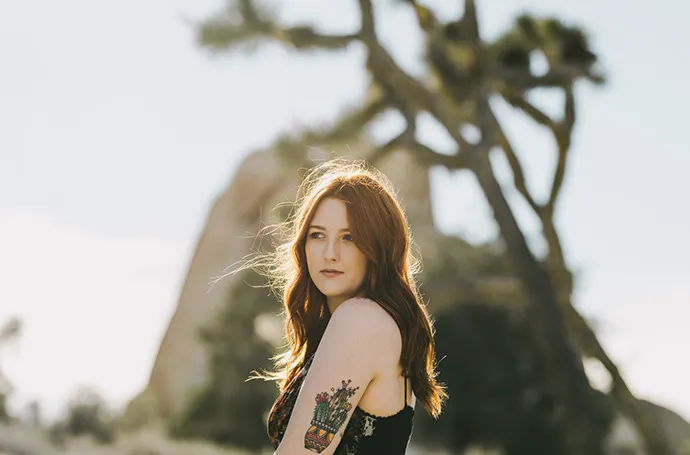

출저: adobe

## 회고
피사계심도를 구현하기 위해 여러가지 시도들을 했지만 블러처리한 이미지에 큰 변화를 잡아내지 못했다.
다음에는 Unet과 같은 다양한 모델들을 사용하여 다시 시도해보아야겠다는 생각이 들었다.